In [57]:
import pandas as pd
import numpy as np

In [58]:
import warnings
warnings.filterwarnings('ignore')

In [59]:
df = pd.read_csv('Housing.csv')

In [60]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [62]:
#df['furnishingstatus'].value_counts()

In [63]:
'''
def furnishingstatusInt(str):
    if str == 'semi-furnished':
        return 1
    elif str == 'furnished':
        return 2
    return 0
df['guestroom'] = df['guestroom'].apply(lambda x: 1 if x == 'yes' else 0)
df['mainroad'] = df['mainroad'].apply(lambda x: 1 if x == 'yes' else 0)
df['basement'] = df['basement'].apply(lambda x: 1 if x == 'yes' else 0)
df['hotwaterheating'] = df['hotwaterheating'].apply(lambda x: 1 if x == 'yes' else 0)
df['airconditioning'] = df['airconditioning'].apply(lambda x: 1 if x == 'yes' else 0)
df['prefarea'] = df['prefarea'].apply(lambda x: 1 if x == 'yes' else 0)
df['furnishingstatus'] = df['furnishingstatus'].apply(furnishingstatusInt)
'''

"\ndef furnishingstatusInt(str):\n    if str == 'semi-furnished':\n        return 1\n    elif str == 'furnished':\n        return 2\n    return 0\ndf['guestroom'] = df['guestroom'].apply(lambda x: 1 if x == 'yes' else 0)\ndf['mainroad'] = df['mainroad'].apply(lambda x: 1 if x == 'yes' else 0)\ndf['basement'] = df['basement'].apply(lambda x: 1 if x == 'yes' else 0)\ndf['hotwaterheating'] = df['hotwaterheating'].apply(lambda x: 1 if x == 'yes' else 0)\ndf['airconditioning'] = df['airconditioning'].apply(lambda x: 1 if x == 'yes' else 0)\ndf['prefarea'] = df['prefarea'].apply(lambda x: 1 if x == 'yes' else 0)\ndf['furnishingstatus'] = df['furnishingstatus'].apply(furnishingstatusInt)\n"

In [64]:
df['guestroom'] = df['guestroom'].map({'yes':1, 'no':0})
df['mainroad'] = df['mainroad'].map({'yes':1, 'no':0})
df['basement'] = df['basement'].map({'yes':1, 'no':0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes':1, 'no':0})
df['airconditioning'] = df['airconditioning'].map({'yes':1, 'no':0})
df['prefarea'] = df['prefarea'].map({'yes':1, 'no':0})

In [65]:
status = pd.get_dummies(df.furnishingstatus, drop_first=True)
status.head()
df.drop(['furnishingstatus'], axis=1, inplace=True)
df = pd.concat([df, status], axis=1)

In [77]:
#df-df.mean()
df = (df - df.mean()) /df.std()

In [79]:
df.info()
df.shape
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            545 non-null    float64
 1   area             545 non-null    float64
 2   bedrooms         545 non-null    float64
 3   bathrooms        545 non-null    float64
 4   stories          545 non-null    float64
 5   mainroad         545 non-null    float64
 6   guestroom        545 non-null    float64
 7   basement         545 non-null    float64
 8   hotwaterheating  545 non-null    float64
 9   airconditioning  545 non-null    float64
 10  parking          545 non-null    float64
 11  prefarea         545 non-null    float64
 12  semi-furnished   545 non-null    float64
 13  unfurnished      545 non-null    float64
dtypes: float64(14)
memory usage: 59.7 KB


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,4.562174,1.045766,1.402131,1.420507,1.376952,0.405251,-0.464888,-0.733865,-0.219063,1.471267,1.516299,1.803284,-0.844113,-0.69579
1,4.000809,1.755397,1.402131,5.400847,2.529700,0.405251,-0.464888,-0.733865,-0.219063,1.471267,2.676950,-0.553526,-0.844113,-0.69579
2,4.000809,2.216196,0.047235,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,-0.678439,1.516299,1.803284,1.182502,-0.69579
3,3.982096,1.082630,1.402131,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,1.471267,2.676950,1.803284,-0.844113,-0.69579
4,3.551716,1.045766,1.402131,-0.569663,0.224204,0.405251,2.147110,1.360148,-0.219063,1.471267,1.516299,-0.553526,-0.844113,-0.69579


In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.063656,-0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.006156,-0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.050040,-0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.029834,-0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.003648,-0.082972
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.011450,-0.133123
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.005821,-0.099023
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.050284,-0.117935
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.063819,-0.059194
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.053179,-0.094086


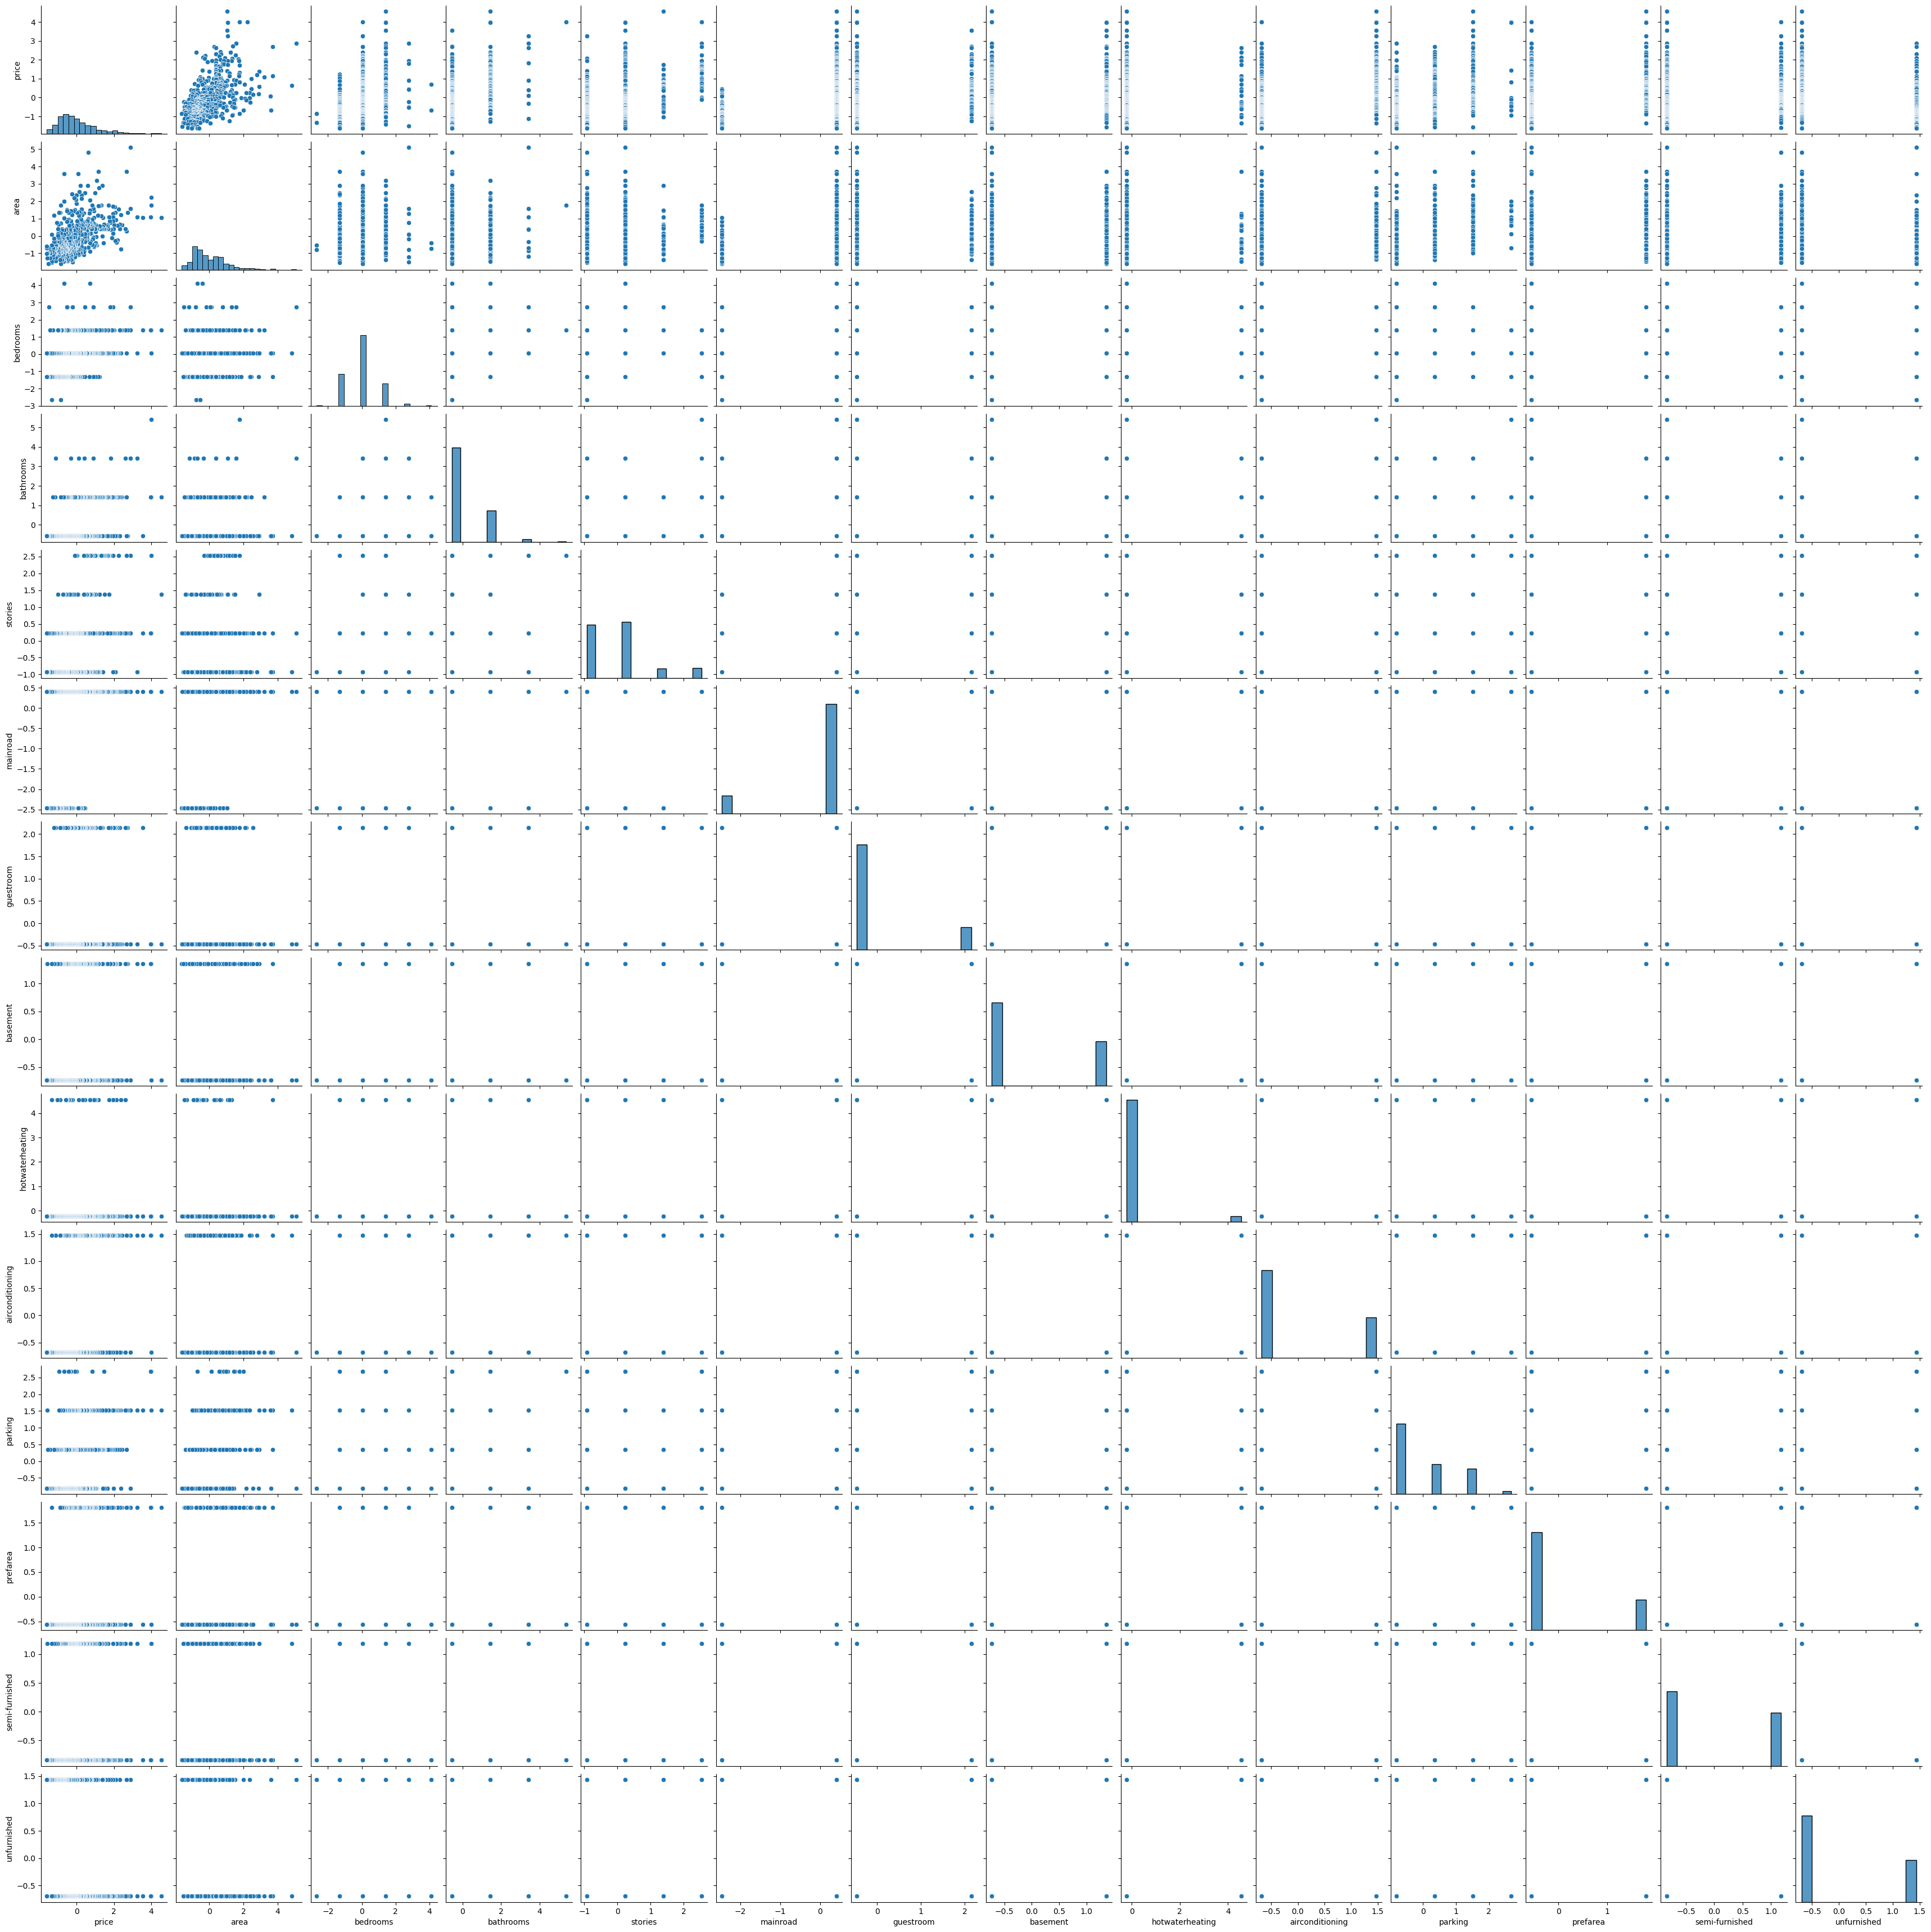

In [82]:
sns.pairplot(df)

<Axes: >

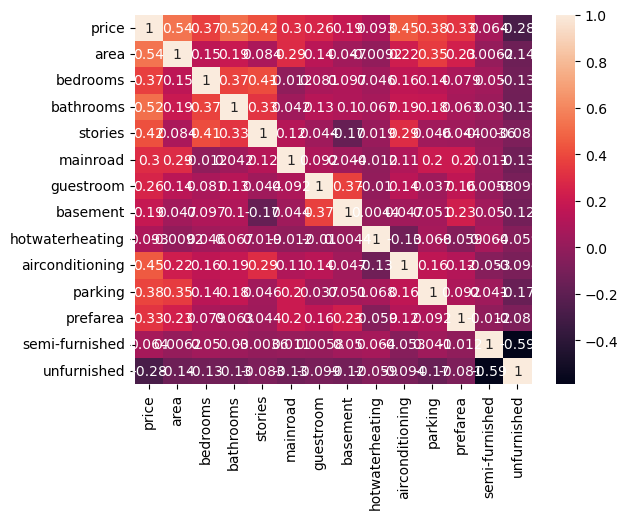

In [71]:
sns.heatmap(df.corr(), annot=True)

In [103]:
#Applying the gradient descent for area and price
X = df.area
y = df.price

In [105]:
print(y)

0      4.562174
1      4.000809
2      4.000809
3      3.982096
4      3.551716
         ...   
540   -1.575421
541   -1.603676
542   -1.612845
543   -1.612845
544   -1.612845
Name: price, Length: 545, dtype: float64


In [94]:
a = np.array([1,2,3,4])
len(a)
a*a
sum(a*a)
print(len(a))

4


In [106]:
def grandientDesc(X, y, m=0, c=0, interation=1000, learning_rate = 0.01):
    N = len(y)
    gd_df = pd.DataFrame( columns = ['m_current', 'c_current','cost'])
    # cost = SUM( (y-y_pred)**2 ) = SUM( (y - (mx + c) )**2 )
    # partial diff with restpect to m
    #         => 2* SUM( (y - (mx+c) ) ( -x ) ) = 2 * SUM ( (mx+c)x - xy )
    # partial diff with respect to c
    #         => 2 * SUM ( y - (mx +c) (1) ) = 2 * SUM( y - (mx+c) )
    for x in range(interation):
        y_pred = (m * X )+ c
        cost = sum( (y-y_pred)*(y-y_pred) ) / N
        m_gr = 2/N*( sum( X * ( y_pred - y ) ) )
        c_gr = 2/N * ( sum( y - y_pred ) )
        m = m - (learning_rate * m_gr)
        c = c - (learning_rate * c_gr)
        gd_df.loc[x] = [m,c,cost]
    return gd_df

In [107]:
gr = grandientDesc(X, y)
gr

,m_current,c_current,cost
0,0.010700,-7.333583e-18,0.998165
1,0.021187,-2.354895e-17,0.986830
2,0.031464,-3.335966e-17,0.975943
3,0.041536,-2.983954e-17,0.965486
4,0.051407,-2.732982e-17,0.955442
...,...,...,...
995,0.535997,-9.284414e-08,0.711399
996,0.535997,-9.470102e-08,0.711399
997,0.535997,-9.659504e-08,0.711399
998,0.535997,-9.852695e-08,0.711399


<Axes: xlabel='index'>

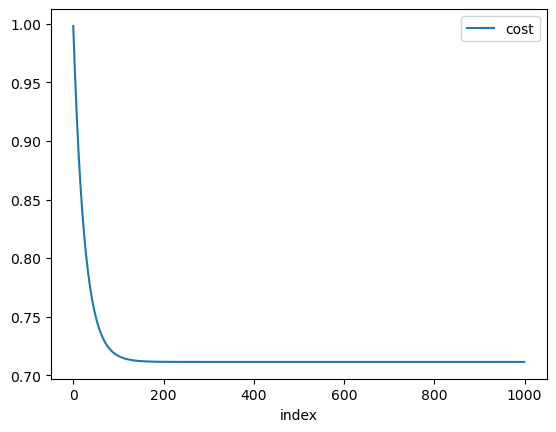

In [110]:
gr.reset_index().plot.line(x='index', y=['cost'])

In [112]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,4.562174,1.045766,1.402131,1.420507,1.376952,0.405251,-0.464888,-0.733865,-0.219063,1.471267,1.516299,1.803284,-0.844113,-0.69579
1,4.000809,1.755397,1.402131,5.400847,2.529700,0.405251,-0.464888,-0.733865,-0.219063,1.471267,2.676950,-0.553526,-0.844113,-0.69579
2,4.000809,2.216196,0.047235,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,-0.678439,1.516299,1.803284,1.182502,-0.69579
3,3.982096,1.082630,1.402131,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,1.471267,2.676950,1.803284,-0.844113,-0.69579
4,3.551716,1.045766,1.402131,-0.569663,0.224204,0.405251,2.147110,1.360148,-0.219063,1.471267,1.516299,-0.553526,-0.844113,-0.69579


In [116]:
X_mul = df[ ['area', 'bedrooms'] ]

In [124]:
X_mul['intercept'] = 1

In [127]:
X_mul.reindex(['intercept','area','bedrooms'], axis=1)

,intercept,area,bedrooms
0,1,1.045766,1.402131
1,1,1.755397,1.402131
2,1,2.216196,0.047235
3,1,1.082630,1.402131
4,1,1.045766,1.402131
...,...,...,...
540,1,-0.990968,-1.307661
541,1,-1.267448,0.047235
542,1,-0.705273,-1.307661
543,1,-1.032440,0.047235


In [128]:
# Convert X and y to arrays
X_mul = np.array(X_mul)
y = np.array(y)

In [129]:
# Theta is the vector representing coefficients (intercept, area, bedrooms)
theta = np.matrix(np.array([0,0,0])) 
alpha = 0.01
iterations = 1000

In [130]:
# define cost function
# takes in theta (current values of coefficients b0, b1, b2), X and y
# returns total cost at current b0, b1, b2

def compute_cost(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

In [132]:
# gradient descent
# takes in current X, y, learning rate alpha, num_iters
# returns cost (notice it uses the cost function defined above)

def gradient_descent_multi(X, y, theta, alpha, iterations):
    theta = np.zeros(X.shape[1])
    m = len(X)
    gdm_df = pd.DataFrame( columns = ['Bets','cost'])

    for i in range(iterations):
        gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
        theta = theta - alpha * gradient
        cost = compute_cost(X, y, theta)
        gdm_df.loc[i] = [theta,cost]

    return gdm_df

In [135]:
# print costs with various values of coefficients b0, b1, b2
gr = gradient_descent_multi(X_mul, y, theta, alpha, iterations)

<Axes: xlabel='index'>

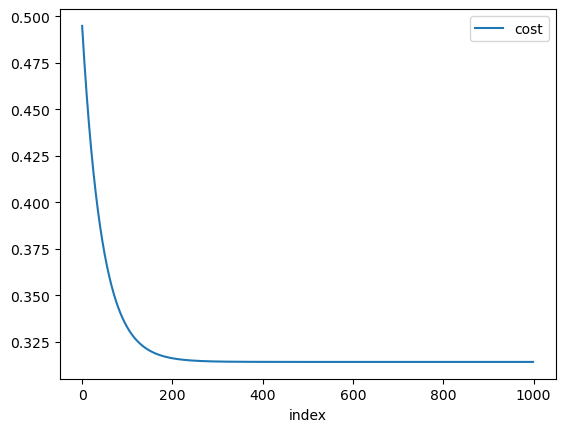

In [137]:
gr.reset_index().plot.line(x='index', y=['cost'])